In [479]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [480]:
df1=pd.read_csv('reddit.csv')
df1

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,[1],"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",[3],['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,NaN,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,[1],"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,"[2, 3]","[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,[8],['its inappropriate to use the word faggot as ...
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,NaN,NaN
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,"[1, 4]","[""using the word 'nigger' is a direct attack t..."
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",[1],"[""using the words 'faggot fuckers' is offensiv..."


In [481]:
df1['id'][0]

'1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \t\t\te8qfn91\n'

In [482]:
df1['text'][0]

"1. A subsection of retarded Hungarians? Ohh boy. brace for a livid Bulbasaur coming in here trying to hate a hole in some of her stupider countrymen.\n2. \tHiii. Just got off work. 444 is mainly the typa guys you imagine writing for US stupid sites, but basically they just try to fit in with the Western European and US big city hipsters.   Rich kids from Budapest who feel they are brave journalistic heroes.  \n3. \t\twow i guess soyboys are the same in every country\n4. \t\t\tOwen Benjamin's soyboy song goes for every country and that's why it's so amazing. \n"

In [483]:
df1['hate_speech_idx'].describe()

count     3847
unique     316
top        [1]
freq      1740
Name: hate_speech_idx, dtype: object

In [484]:
df1['hate_speech_idx'].loc[~df1['hate_speech_idx'].isnull()] = 1
df1['hate_speech_idx'].loc[df1['hate_speech_idx'].isnull()] = 0  

In [485]:
df1

,id,text,hate_speech_idx,response
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,1,"[""I don't see a reason why it's okay to insult..."
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",1,['Persons with disabilities is the accepted te...
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0,NaN
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,1,"[""It's not right for anyone of any gender to b..."
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,1,"[""You shouldn't be bringing up sensitive topic..."
...,...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,1,['its inappropriate to use the word faggot as ...
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,0,NaN
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,1,"[""using the word 'nigger' is a direct attack t..."
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",1,"[""using the words 'faggot fuckers' is offensiv..."


In [486]:
data=df1
data=data.drop(columns=['response'])
data

,id,text,hate_speech_idx
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,1
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",1


In [487]:
import matplotlib.pyplot as plt
import seaborn as sns

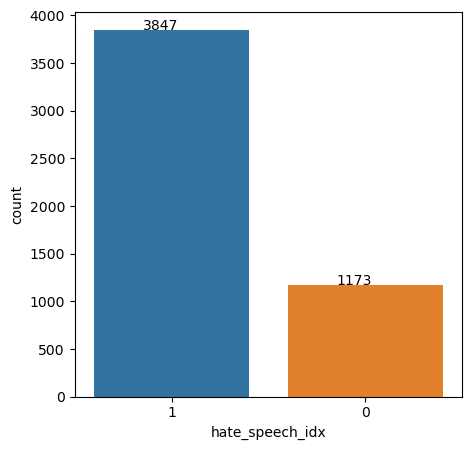

In [488]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=data['hate_speech_idx'],data=data,order=data['hate_speech_idx'].value_counts().index)
for p,label in zip(ax.patches,data['hate_speech_idx'].value_counts()):
    ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.5))

In [489]:
data=data.rename(columns={"hate_speech_idx":"hate_speech"})
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. A subsection of retarded Hungarians? Ohh bo...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means I live i...",1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0
3,1. e7kq72n\n2. \te7m24ar\n,1. Because the Japanese aren't retarded and kn...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. That might be true if we didn't have an exa...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. Who does she claim as *her people*?\n2. \tI...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. Here's what's going to happen: Broward is ...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. Oh boy...so here comes a long venting post ...,1
5018,1. dwp8jut\n,"1. OP, stop being a faggot and post videos nex...",1


In [490]:
data.describe()

,id,text,hate_speech
count,5020,5020,5020
unique,5015,5002,2
top,1. e9ai3dh\n,1. What a cunt. \n,1
freq,2,4,3847


**Why do we need to convert text into lowercase?**

**When we tokenize a sentence word by word, same word represented in upper and lower case notations
are identified as different words.For example, ‘Basic’ and ‘basic’ are considered different but they both are same,because
python is case-sensitive,it adds complexity to model, to simplify it we do lowercasing.**

In [491]:
import string

In [492]:
data['text']=data['text'].str.lower()


In [493]:
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. a subsection of retarded hungarians? ohh bo...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means i live i...",1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0
3,1. e7kq72n\n2. \te7m24ar\n,1. because the japanese aren't retarded and kn...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. that might be true if we didn't have an exa...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. who does she claim as *her people*?\n2. \ti...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. here's what's going to happen: broward is ...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. oh boy...so here comes a long venting post ...,1
5018,1. dwp8jut\n,"1. op, stop being a faggot and post videos nex...",1


# Removing HTML Tags

**Removing unwanted data from the text, let’s take the case of scraping data from web,
where we get html tags which are unnecessary for the data,those should be removed.**

In [494]:
import re

In [495]:
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)

In [496]:
data['text']=data['text'].apply(remove_html_tags)


In [497]:
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. a subsection of retarded hungarians? ohh bo...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means i live i...",1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0
3,1. e7kq72n\n2. \te7m24ar\n,1. because the japanese aren't retarded and kn...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. that might be true if we didn't have an exa...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. who does she claim as *her people*?\n2. \ti...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. here's what's going to happen: broward is ...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. oh boy...so here comes a long venting post ...,1
5018,1. dwp8jut\n,"1. op, stop being a faggot and post videos nex...",1


# Removing URL

In [498]:
def remove_url(text):
    pattern=re.compile(r'https?://\s+|www.\.\S+')
    return pattern.sub(r'',text)

In [499]:
data['text']=data['text'].apply(remove_url)

In [500]:
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1. a subsection of retarded hungarians? ohh bo...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,"1. > ""y'all hear sumn?"" by all means i live i...",1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1. wouldn't the defenders or whatever they are...,0
3,1. e7kq72n\n2. \te7m24ar\n,1. because the japanese aren't retarded and kn...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1. that might be true if we didn't have an exa...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1. who does she claim as *her people*?\n2. \ti...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1. here's what's going to happen: broward is ...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1. oh boy...so here comes a long venting post ...,1
5018,1. dwp8jut\n,"1. op, stop being a faggot and post videos nex...",1



# Stop words Removal

**Words which help in sentence formation, but does not aid any meaning to the sentence 
like ‘a’, ‘an’, ‘the’, ‘is’ and so on.**

In [501]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
def stop_words_removal(text):
    new_text=[]
    for word in text.split():
        if word in get_stop_words('en'):
            new_text.append('')
        else:
            new_text.append(word)
    return ' '.join(new_text)

In [502]:
data['text']=data['text'].apply(stop_words_removal)
data['text']

0       1.  subsection  retarded hungarians? ohh boy. ...
1       1. > "y'all hear sumn?"   means  live   small ...
2       1.   defenders  whatever     group    diverse ...
3       1.   japanese  retarded  know  *fictional char...
4       1.  might  true      example   whole segment  ...
                              ...                        
5015    1.    claim  *her people*? 2.  believe   refer...
5016    1.   going  happen: broward  magically going  ...
5017    1. oh boy...so  comes  long venting post   can...
5018    1. op, stop   faggot  post videos next time.  ...
5019    1.   20 minute long video, top hate  champagne...
Name: text, Length: 5020, dtype: object

# Removing Punctuations

**When we are tokenizing the sentences, punctuations become different words, ‘for example Hello! how are you?’ 
when we tokenize it can become Hello , !, how ,are, you,? here punctuation marks are taken as different words. 
It adds complexity to the model by performing more operations to the code and punctuations does not attribute any meaning to the sentence.**

In [503]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [504]:
exclude=string.punctuation

In [505]:
def remove_punc(text):
    for char in exclude:
        text=text.replace(char,'')
    return text

In [506]:
data['text']=data['text'].apply(remove_punc)

In [507]:
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1 subsection retarded hungarians ohh boy bra...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,1 yall hear sumn means live small town r...,1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1 defenders whatever group diverse g...,0
3,1. e7kq72n\n2. \te7m24ar\n,1 japanese retarded know fictional charac...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1 might true example whole segment ...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1 claim her people 2 believe referring ...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1 going happen broward magically going co...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1 oh boyso comes long venting post can wo...,1
5018,1. dwp8jut\n,1 op stop faggot post videos next time hard,1



# Chat Word treatment

**words like ROFL,LMAO,FYI,GD,ASAP, are found in chat messages of many social media platforms like WhatsApp, Instagram, Twitter.
While summarizing the text, to understand the meaning of the word, these short words should be replaced with long forms.**

In [508]:
chat_words={'AFAIK': 'As Far As I Know',
'AFK':'Away From Keyboard',
'ASAP':'As Soon As Possible',
'ATK':'At The Keyboard',
'ATM':'At The Moment',
'A3':'Anytime, Anywhere, Anyplace',
'BAK':'Back At Keyboard',
'BBL': 'Be Back Later',
'BBS': 'Be Back Soon',
'BFN': 'Bye For Now',
'B4N': 'Bye For Now',
'BRB': 'Be Right Back',
'BRT': 'Be Right There',
'BTW': 'By The Way',
'B4': 'Before',
'B4N': 'Bye For Now',
'CU':'See You',
'CUL8R':'See You Later',
'CYA': 'See You',
'FAQ': 'Frequently Asked Questions',
'FC': 'Fingers Crossed',
'FWIW': 'For What Its Worth',
'FYI': 'For Your Information',
'GAL': 'Get A Life',
'GG': 'Good Game',
'GN' : 'Good Night',
'GMTA': 'Great Minds Think Alike',
'GR8': 'Great!',
'G9': 'Genius',
'IC': 'I See',
'ICQ': 'I Seek you (also a chat program)',
'ILU': 'I Love You',
'IMHO': 'In My Honest/Humble Opinion',
'IMO':'In My Opinion',
'IOW':'In Other Words',
'IRL': 'In Real Life',
'KISS':'Keep It Simple, Stupid',
'LDR':'Long Distance Relationship',
'LMAO':'Laugh My A.. Off',
'LOL':'Laughing Out Loud',
'LTNS': 'Long Time No See',
'L8R': 'Later',
'MTE': 'My Thoughts Exactly',
'M8': 'Mate',
'NRN': 'No Reply Necessary',
'OIC':'Oh I See',
'PITA':'Pain In The A..',
'PRT': 'Party',
'PRW':'Parents Are Watching',
'QPSA':	'Que Pasa?',
'ROFL':'Rolling On The Floor Laughing',
'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
'ROTFLMAO':'Rolling On The Floor Laughing My A.. Off',
'SK8':'Skate',
'STATS':'Your sex and age',
'ASL':'Age, Sex, Location',
'THX':'Thank You',
'TTFN':'Ta-Ta For Now!',
'TTYL':'Talk To You Later',
'U':'You',
'U2':'You Too',
'U4E':'Yours For Ever',
'WB':'Welcome Back',
'WTF':'What The F...',
'WTG':'Way To Go!',
'WUF':'Where Are You From?',
'W8':'Wait...',
'7K':'Sick'}

In [509]:
data['text'][2]

'1   defenders  whatever     group    diverse group  since  know    blind dude  orphan  black man  woman     supporting cast  x200b  also believe   marvel stuff  going  get canceled  netflix  next year disney  launching   streaming platform  will want  many characters   can get  shows   2 inclusive   white 3 “harvard  working    inclusive” “oh  they’re accepting  students next year” “no  meant they’re literally  racist  asians” 👌 4 oh yeah   lawsuit going  benefit whites   long run unacceptable   view 5  anticaucasian litigation union 6 aclu   hate religion just christianity 7  never understood  sentiment   atheist bordering   titheist  dislike  theistic religions equally   religion  gets  pass   book  buddhism    got  long death list yet 8   hell   dislike christianity  islam equally   atheist  can live  openly antichristian life right    stilllargely christian nation thanks entirely   tolerance  peacefulness  christians    widely  aggressively oppressed  virtually  muslim majority co

In [510]:
def chat_word(text):
    new_text=[]
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
            
    return " ".join(new_text)

In [511]:
data['text']=data['text'].apply(chat_word)
data

,id,text,hate_speech
0,1. e8q18lf\n2. \te8q9w5s\n3. \t\te8qbobk\n4. \...,1 subsection retarded hungarians ohh boy brace...,1
1,1. e9c6naz\n2. \te9d03a5\n3. \t\te9d8e4d\n,1 yall hear sumn means live small town rn for ...,1
2,1. e84rl2i\n2. \te84w60l\n3. \t\te8544rn\n4. \...,1 defenders whatever group diverse group since...,0
3,1. e7kq72n\n2. \te7m24ar\n,1 japanese retarded know fictional characters ...,1
4,1. e7hdgoh\n2. \te7iyj6a\n3. \t\te7j6iho\n4. \...,1 might true example whole segment us populati...,1
...,...,...,...
5015,1. e90fta8\n2. \te90g8px\n3. \t\te90jlq5\n4. \...,1 claim her people 2 believe referring synagog...,1
5016,1. e9b7mn2\n2. \te9bv6ir\n,1 going happen broward magically going come en...,0
5017,1. e7q8ilv\n2. \te7qddqq\n3. \t\te7qstbc\n4. \...,1 oh boyso comes long venting post can worms e...,1
5018,1. dwp8jut\n,1 op stop faggot post videos next time hard,1


In [512]:
data['text'][2]

'1 defenders whatever group diverse group since know blind dude orphan black man woman supporting cast x200b also believe marvel stuff going get canceled netflix next year disney launching streaming platform will want many characters can get shows 2 inclusive white 3 “harvard working inclusive” “oh they’re accepting students next year” “no meant they’re literally racist asians” 👌 4 oh yeah lawsuit going benefit whites long run unacceptable view 5 anticaucasian litigation union 6 aclu hate religion just christianity 7 never understood sentiment atheist bordering titheist dislike theistic religions equally religion gets pass book buddhism got long death list yet 8 hell dislike christianity islam equally atheist can live openly antichristian life right stilllargely christian nation thanks entirely tolerance peacefulness christians widely aggressively oppressed virtually muslim majority country 9 christians tolerant paceful now couple centiuries revolutions started french influence marxism

# Handling emoji’s

**While analyzing chatting messages, for text classification or sentiment analysis, emoji’s particularly have a meaning, we can replace emoji expression with their corresponding meaning. 
If our problem statement does not have anything to do with sentiments or feelings,we can remove them.**

In [513]:
import re
def emoji_removal(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [514]:
data['text']=data['text'].apply(emoji_removal)

In [515]:
data['text'][2]

'1 defenders whatever group diverse group since know blind dude orphan black man woman supporting cast x200b also believe marvel stuff going get canceled netflix next year disney launching streaming platform will want many characters can get shows 2 inclusive white 3 “harvard working inclusive” “oh they’re accepting students next year” “no meant they’re literally racist asians”  4 oh yeah lawsuit going benefit whites long run unacceptable view 5 anticaucasian litigation union 6 aclu hate religion just christianity 7 never understood sentiment atheist bordering titheist dislike theistic religions equally religion gets pass book buddhism got long death list yet 8 hell dislike christianity islam equally atheist can live openly antichristian life right stilllargely christian nation thanks entirely tolerance peacefulness christians widely aggressively oppressed virtually muslim majority country 9 christians tolerant paceful now couple centiuries revolutions started french influence marxism 

# Tokenization

**Breaking the text into sentences and words, we understand context of the text and
we can also the find the topic of the text and many more.**

In [516]:
from nltk.tokenize import word_tokenize

In [517]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [518]:
data['text']=data['text'].apply(word_tokenize)

In [519]:
data['text']

0       [1, subsection, retarded, hungarians, ohh, boy...
1       [1, yall, hear, sumn, means, live, small, town...
2       [1, defenders, whatever, group, diverse, group...
3       [1, japanese, retarded, know, fictional, chara...
4       [1, might, true, example, whole, segment, us, ...
                              ...                        
5015    [1, claim, her, people, 2, believe, referring,...
5016    [1, going, happen, broward, magically, going, ...
5017    [1, oh, boyso, comes, long, venting, post, can...
5018    [1, op, stop, faggot, post, videos, next, time...
5019    [1, 20, minute, long, video, top, hate, champa...
Name: text, Length: 5020, dtype: object

# Stemming

**Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
Inflection is the modification of a word to express different grammatical categories such as tense, voice, aspect, person, gender and mood.
In stemming, inflection is not cared much, other than the reducing the word to its stem.**

In [520]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')


In [521]:
data['text'] = data['text'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [522]:
data['text'][2]

['1',
 'defend',
 'whatev',
 'group',
 'divers',
 'group',
 'sinc',
 'know',
 'blind',
 'dude',
 'orphan',
 'black',
 'man',
 'woman',
 'support',
 'cast',
 'x200b',
 'also',
 'believ',
 'marvel',
 'stuff',
 'go',
 'get',
 'cancel',
 'netflix',
 'next',
 'year',
 'disney',
 'launch',
 'stream',
 'platform',
 'will',
 'want',
 'mani',
 'charact',
 'can',
 'get',
 'show',
 '2',
 'inclus',
 'white',
 '3',
 '“',
 'harvard',
 'work',
 'inclus',
 '”',
 '“',
 'oh',
 'they',
 '’',
 're',
 'accept',
 'student',
 'next',
 'year',
 '”',
 '“',
 'no',
 'meant',
 'they',
 '’',
 're',
 'liter',
 'racist',
 'asian',
 '”',
 '4',
 'oh',
 'yeah',
 'lawsuit',
 'go',
 'benefit',
 'white',
 'long',
 'run',
 'unaccept',
 'view',
 '5',
 'anticaucasian',
 'litig',
 'union',
 '6',
 'aclu',
 'hate',
 'religion',
 'just',
 'christian',
 '7',
 'never',
 'understood',
 'sentiment',
 'atheist',
 'border',
 'titheist',
 'dislik',
 'theistic',
 'religion',
 'equal',
 'religion',
 'get',
 'pass',
 'book',
 'buddhism',


# Lemmatization

**Lemmatization unlike stemming reduces inflected words properly ensuring that the root word belongs to the language.
In the lemmatization root word is called lemma.**

In [523]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [536]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
def lemmatizing(text):
    return " ".join([wnl.lemmatize(word,pos='v') for word in text.split('  ')])


In [537]:
data['text']=data['text'].apply(lemmatizing)

In [538]:
data['text'][2]

'1 defend whatev group divers group sinc know blind dude orphan black man woman support cast x200b also believ marvel stuff go get cancel netflix next year disney launch stream platform will want mani charact can get show 2 inclus white 3 “ harvard work inclus ” “ oh they ’ re accept student next year ” “ no mean they ’ re liter racist asian ” 4 oh yeah lawsuit go benefit white long run unaccept view 5 anticaucasian litig union 6 aclu hate religion just christian 7 never understand sentiment atheist border titheist dislik theistic religion equal religion get pass book buddhism get long death list yet 8 hell dislik christian islam equal atheist can live open antichristian life right stilllarg christian nation thank entir toler peac christian wide aggress oppress virtual muslim major countri 9 christian toler pace now coupl centiuri revolut start french influenc marxism children need go far see exampl thing muslim now differ still havent social chang insid communiti lot reason and them u